In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

Car insurance - predict customer lifetime value based on other variables:

https://www.kaggle.com/datasets/pankajjsh06/ibm-watson-marketing-customer-value-data

In [56]:
clv_data = pd.read_csv("datasets/ibm_watson_customer_lifetime_value.csv")

clv_data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [57]:
clv_data.shape

(9134, 24)

#### there are no null values

In [58]:
clv_data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [59]:
clv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

#### looking for number of unique values 

In [60]:
clv_data.nunique()

Customer                         9134
State                               5
Customer Lifetime Value          8041
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    5
Gender                              3
Income                           5694
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy                              9
Renew Offer Type                    4
Sales Channel                       4
Total Claim Amount               5106
Vehicle Class                       6
Vehicle Size                        3
dtype: int64

#### there are no duplicates

In [61]:
clv_data[clv_data.duplicated()]

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size


In [62]:
clv_data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

#### Average customer lifetime value by type of coverage

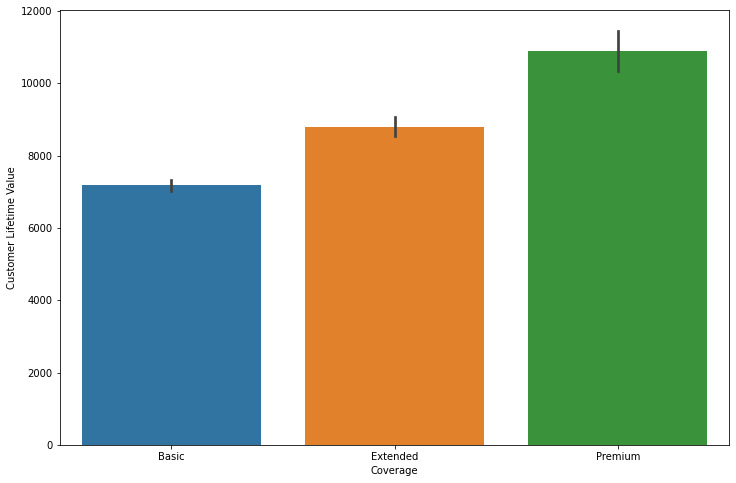

In [63]:
plt.figure(figsize = [12, 8])

sns.barplot(x="Coverage", y="Customer Lifetime Value", data=clv_data)

plt.show()

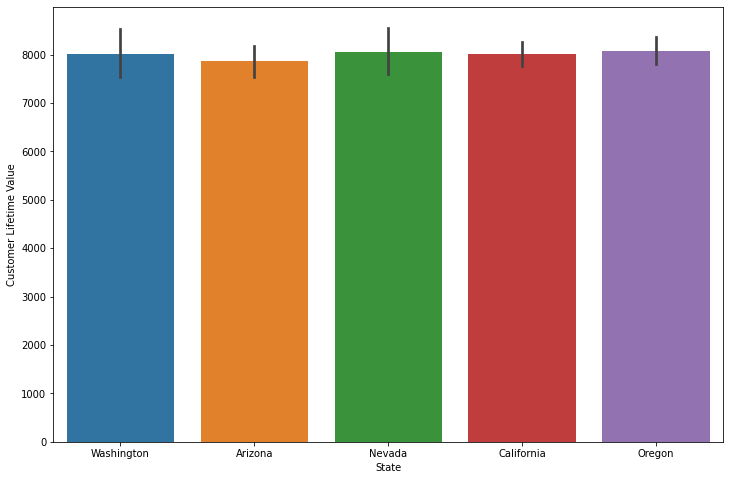

In [64]:
plt.figure(figsize = [12, 8])

sns.barplot(x="State", y="Customer Lifetime Value", data=clv_data)

plt.show()

## TODO Recording:

- Make sure to hover over the state and show the CLV

#### average CLV per State we observe arizona has the lowest and oregon has the highest

In [65]:
state_clv = clv_data[["State", "Customer Lifetime Value"]].groupby("State").mean()

state_clv.index = state_clv.index.map({"Arizona": "AZ", 
                                       "California": "CA", 
                                       "Nevada": "NV", 
                                       "Oregon": "OR", 
                                       "Washington": "WA"})

fig = go.Figure(data=go.Choropleth(locations=state_clv.index, 
                                   z=state_clv["Customer Lifetime Value"], 
                                   locationmode="USA-states"))
fig.update_geos(scope="usa")

fig.show()

#### average clv in each state per coverage

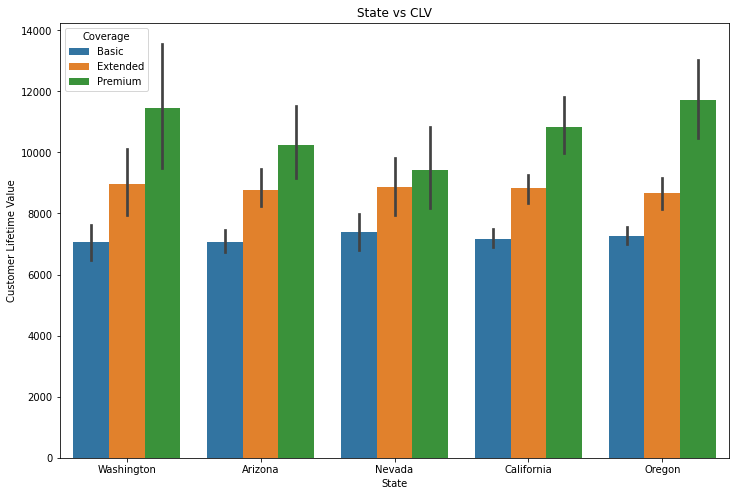

In [66]:
plt.figure(figsize = [12, 8])

sns.barplot(x="State", y="Customer Lifetime Value", data=clv_data, hue="Coverage")

plt.title("State vs CLV")
plt.show()

#### count of open compaints 

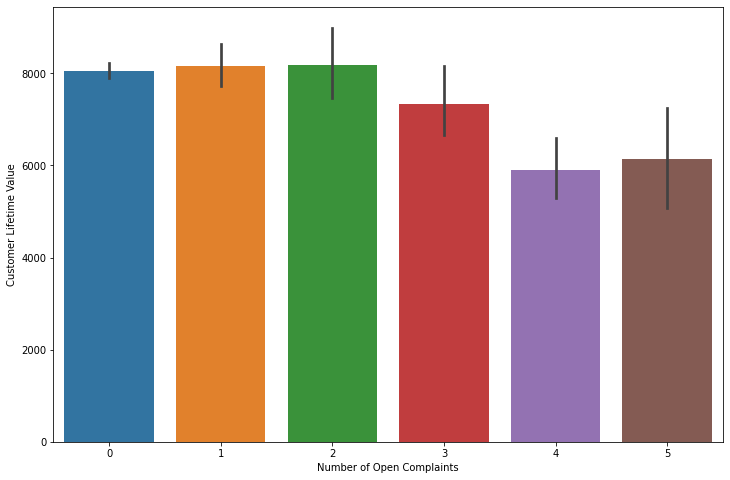

In [67]:
plt.figure(figsize = [12, 8])

sns.barplot(x="Number of Open Complaints", y="Customer Lifetime Value", data=clv_data)


plt.show()

#### seems luxury suv and luxury car tend to have more CLV than others

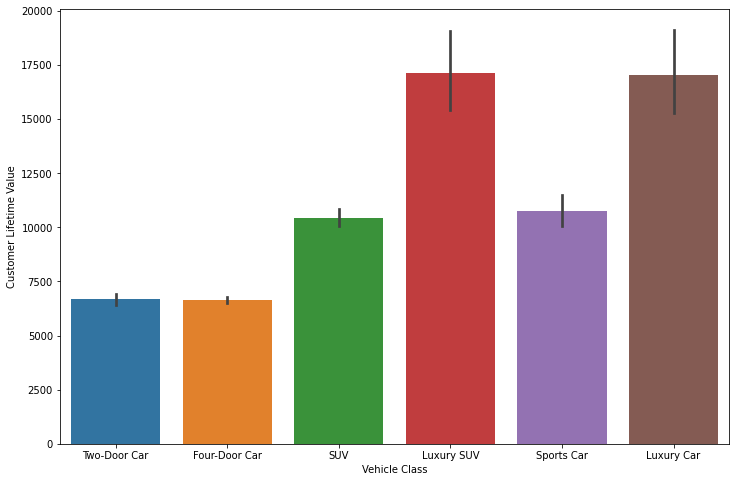

In [68]:
plt.figure(figsize = [12, 8])

sns.barplot(x="Vehicle Class", y="Customer Lifetime Value", data=clv_data)

plt.show()

#### people who buy 2 policies tend to have more CLV

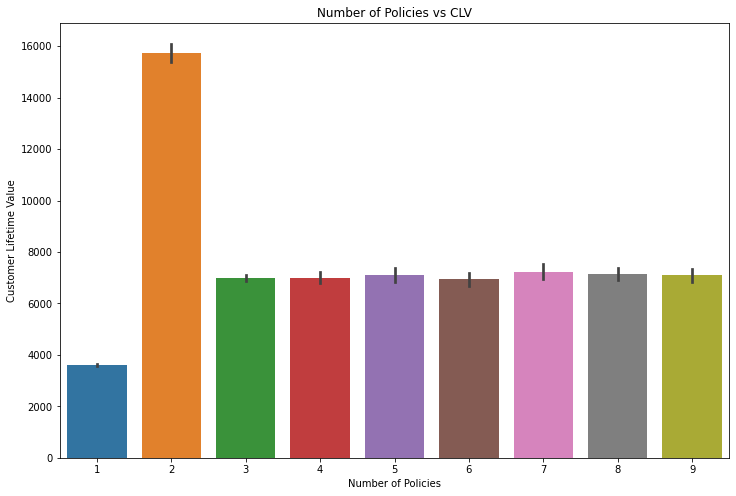

In [69]:
plt.figure(figsize = [12, 8])

sns.barplot(x="Number of Policies", y="Customer Lifetime Value", data=clv_data)

plt.title("Number of Policies vs CLV")
plt.show()

#### masters and high school people slight more CLV than others

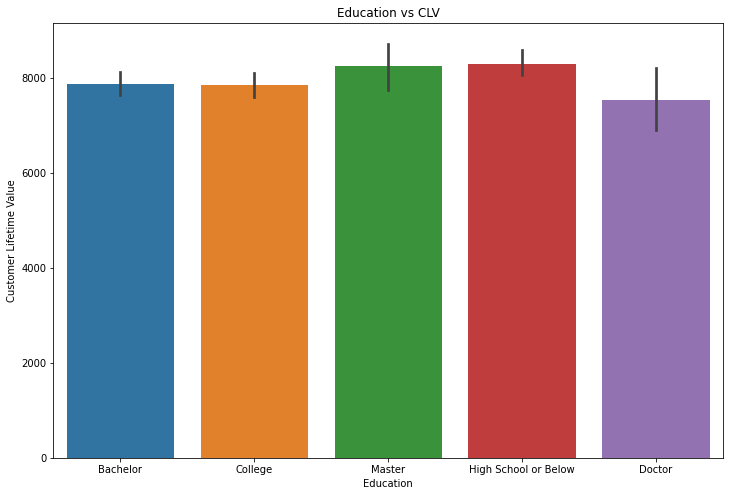

In [70]:
plt.figure(figsize = [12, 8])

sns.barplot(x="Education", y="Customer Lifetime Value", data=clv_data)

plt.title("Education vs CLV")
plt.show()

In [71]:
clv_data_cont_vars = clv_data[["Customer Lifetime Value","Income", "Monthly Premium Auto",
                               "Months Since Last Claim", "Months Since Policy Inception",
                               "Number of Open Complaints", "Number of Policies", "Total Claim Amount"]]

Obtaining correlation scores between numeric feature pairs

In [72]:
corr_mat = clv_data_cont_vars.corr()

corr_mat

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


#### Above matrix is visualised in a heat map form for more clarity

- positively correlated Monthly Premium Auto vs. Claim Amount
- positively correlated Monthly Premium Auto vs. Customer Lifetime Value

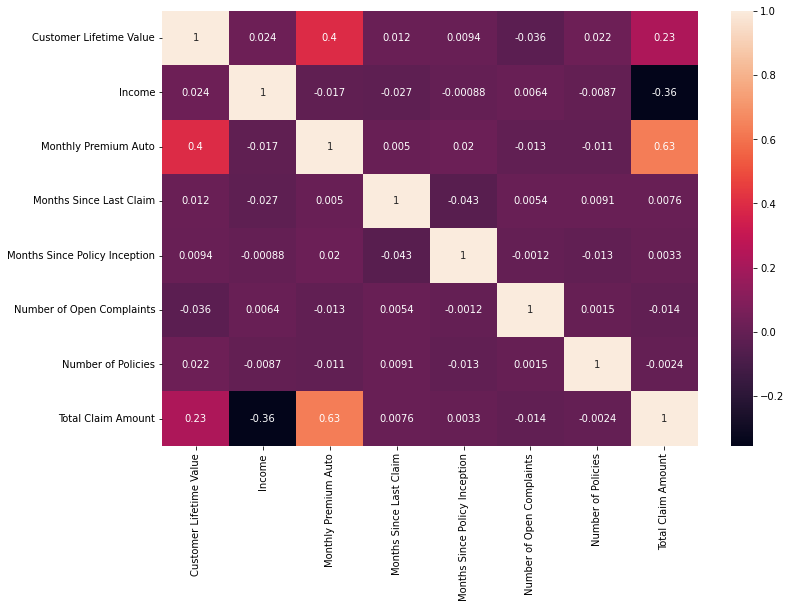

In [73]:
plt.figure(figsize = [12, 8])

sns.heatmap(corr_mat, annot=True)

plt.show()

- Ignoring the hue, note the positive correlation
- Hue helps observe that higher monthly premiums and higher claims are associated with more expensive coverage

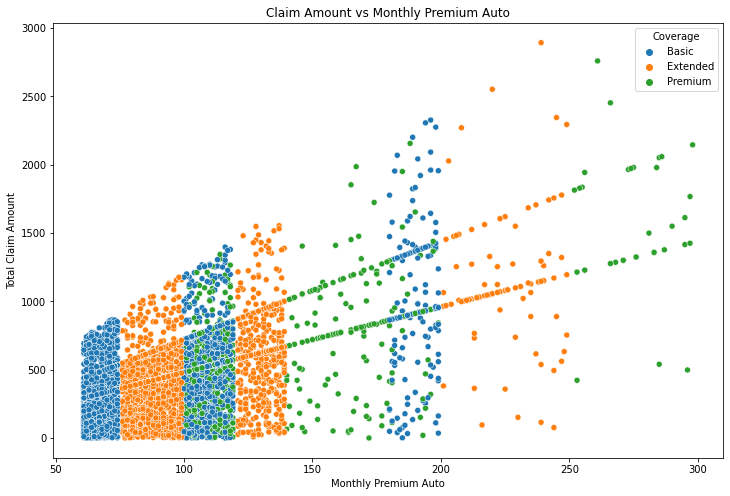

In [74]:
plt.figure(figsize=[12, 8])

sns.scatterplot(x="Monthly Premium Auto", y="Total Claim Amount", hue='Coverage', data=clv_data)

plt.title("Claim Amount vs Monthly Premium Auto")
plt.show()

Positive correlation can be seen.Similar patterns can be seen.

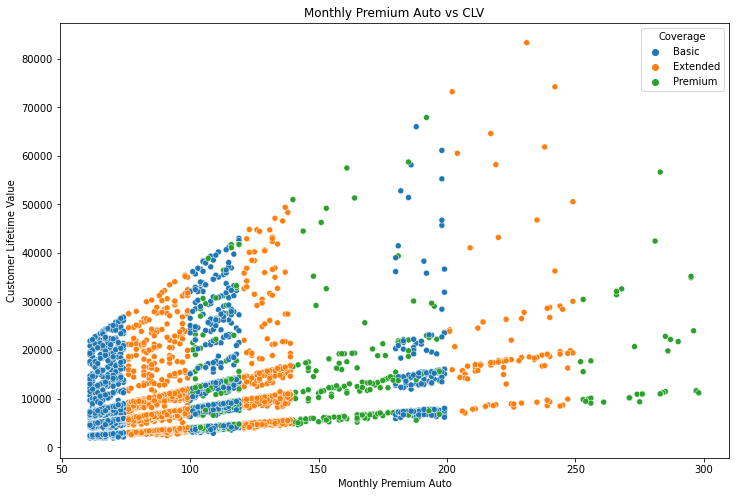

In [75]:
plt.figure(figsize=[12, 8])

sns.scatterplot(x="Monthly Premium Auto", y="Customer Lifetime Value", hue="Coverage", data=clv_data)

plt.title("Monthly Premium Auto vs CLV")
plt.show()

#### since it is a continous variable we must accept the outliers as there can be genuine customers

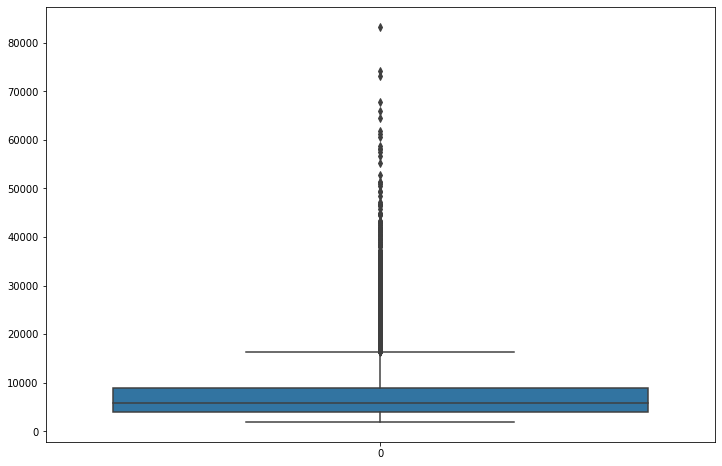

In [76]:
plt.figure(figsize = [12, 8])

sns.boxplot(data=clv_data["Customer Lifetime Value"])

plt.show()

In [77]:
clv_data.drop(["Customer", "Effective To Date"], axis=1, inplace=True)

clv_data.to_csv("datasets/clean_clv.csv", index=False)